### Import Libraries

In [1]:
"If it does not work use code below while running this notebook in this dir."

import matplotlib.pyplot as plt

from mytorch import Tensor, Model
from mytorch import activation as active_func
from mytorch import layer as nn
from mytorch import loss as loss_func
from mytorch import optimizer as optim
from mytorch.util import DataLoader
from mytorch.util import flatten

### Load MNIST

In [2]:
"""
load data set with given data loader.
you have 10000 train data, 1000 for each number, remember to shuffle training data.
you have 1000 test data, 100 for each number.

loaded data is a list of (img, label)
type of img is Tensor.

TODO: you have to get this list and create batches for training.
you can also apply this changes later in the Training part for convenience.
"""
data_loader = DataLoader(train_addr='MNIST/train', test_addr='MNIST/test')
data_loader.load()
"you can see how data is loaded"
print(data_loader.getTrain()[0][0].shape)
print(data_loader.getTrain()[0][1].shape)

loading train...
loading test...
processing...
(500, 28, 28)
(500,)


### Define and Create your Model

In [3]:
class MyModel(Model):
    def __init__(self):
        "TODO: define your layers. order is important"
        self.l1 = nn.conv2d.Conv2d(1, 2, kernel_size=(3, 3))
        self.pool1 = nn.max_pool2d.MaxPool2d(2, 2, kernel_size=(3, 3), stride=(2, 2))
        self.l2 = nn.conv2d.Conv2d(2, 3, kernel_size=(3, 3))
        self.pool2 = nn.max_pool2d.MaxPool2d(3, 3, kernel_size=(3, 3), stride=(2, 2))
        self.fc1 = nn.Linear(7 * 7 * 3, 10)

    def forward(self, x: Tensor) -> Tensor:
        "TODO: define forward pass"
        x = self.l1.forward(x)
        x = self.pool1.forward(x)
        x = self.l2.forward(x)
        x = self.pool2.forward(x)
        x = flatten(x)
        x = self.fc1.forward(x)
        x = active_func.softmax(x)
        return x


model = MyModel()

### Choose a Loss Function

In [4]:
"TODO: choose a proper loss function"
criterion = loss_func.CategoricalCrossEntropy

### Choose an Optimizer

In [5]:
"TODO: choose a proper optimizer"
optimizer = optim.SGD(model.parameters(), 0.003)

In [6]:
def one_hot_encode_array(array):
    # Index this with the input array to get the one-hot encoded array
    one_hot = np.zeros((array.shape[0], 10))
    one_hot[np.arange(array.shape[0]), array.data] = 1
    return Tensor(one_hot)

### Training Model

In [7]:
"TODO: define number of epoch and train batches of data on your model. also test each epoch."
import numpy as np

EPOCH = 20

train_acc = []
test_acc = []
best_train_acc = 0.0
best_test_acc = 0.0

for i in range(EPOCH):
    print("EPOCH {}/{}".format(i + 1, EPOCH))

    trn_corr = 0
    tst_corr = 0

    "TODO: train over your defined batches and save train accuracy for each epoch."
    for j, _data in enumerate(data_loader.getTrain()):
        x_train, y_train = _data
        d = Tensor(x_train.data.reshape((-1, 1, 28, 28)) / 255.0)
        y = one_hot_encode_array(y_train)
        preds = model.forward(d)
        optimizer.zero_grad()
        loss = criterion(preds, y)
        loss.backward()
        optimizer.step()

        predicted = np.argmax(preds.data, 1)
        trn_corr += np.sum(predicted == y_train.data)

    acc = (trn_corr / 10000)
    train_acc.append(acc)
    "TODO: test your model after each training and save test accuracy for each epoch."

    for x_test, y_test in data_loader.getTest():
        d = Tensor(x_test.data.reshape((-1, 1, 28, 28)) / 255.)
        y = one_hot_encode_array(y_test)
        preds = model.forward(d)
        predicted = np.argmax(preds.data, 1)
        tst_corr += np.sum(predicted == y_test.data)

    acc = (tst_corr / 1000)
    test_acc.append(acc)

best_train_acc = max(train_acc)
best_test_acc = max(test_acc)

EPOCH 1/20
EPOCH 2/20
EPOCH 3/20
EPOCH 4/20
EPOCH 5/20
EPOCH 6/20
EPOCH 7/20
EPOCH 8/20
EPOCH 9/20
EPOCH 10/20
EPOCH 11/20
EPOCH 12/20
EPOCH 13/20
EPOCH 14/20
EPOCH 15/20
EPOCH 16/20
EPOCH 17/20
EPOCH 18/20
EPOCH 19/20
EPOCH 20/20


### Evaluate Model Performance

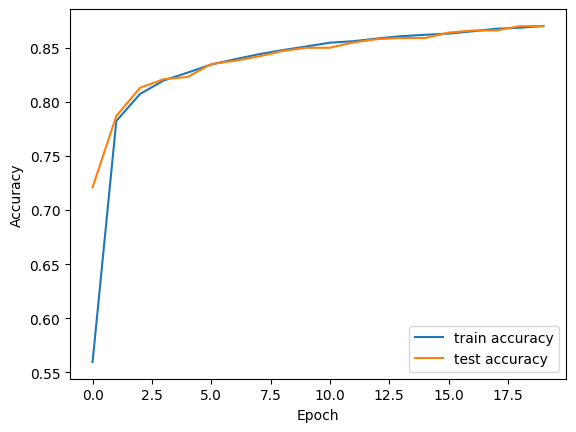


On train - best accuracy: 0.87, final accuracy: 0.87
On test - best accuracy: 0.87, final accuracy: 0.87


In [8]:
plt.plot(train_acc, label='train accuracy')
plt.plot(test_acc, label='test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show();

print("\nOn train - best accuracy: {:.2f}, final accuracy: {:.2f}".format(best_train_acc, train_acc[-1]))
print("On test - best accuracy: {:.2f}, final accuracy: {:.2f}".format(best_test_acc, test_acc[-1]))